# Time-Killer Experiments

## Dependencies

In [134]:
#import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
%matplotlib inline

from math import sqrt
SPINE_COLOR = 'gray'

## Latex Style (Optional)

In [203]:
<!-- hide code
# Style parameters
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 50)
pd.options.display.mpl_style = 'default'
new_style = {'grid': True}
mpl.rc('axes', **new_style)

# cool colors
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

#font = {'family' : 'normal',
#        'weight' : 'bold',
#        'size'   : 10}

#mpl.rc('font', **font)

#Direct input 
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 10,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 
fig = plt.figure()

#You must select the correct size of the plot in advance
#fig.set_size_inches(3.54,3.54) 

def legendaryFormat(leg, resize=True):
    # The frame is matplotlib.patches.Rectangle instance surrounding the legend.
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('white')

    # Set the fontsize
    if(resize):
        for label in legend.get_texts():
            label.set_fontsize('large')
        for label in legend.get_lines():
            label.set_linewidth(2)  # the legend line width
        
        
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 10,
              'text.fontsize': 9, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'font.family' : 'helvetica',
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    mpl.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax
end hide code -->

SyntaxError: invalid syntax (<ipython-input-203-2ff5fabbe8d9>, line 1)

In [56]:
%matplotlib inline

In [57]:
#run for latex-optimised generation
latexify()

/Users/carbone/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Data Preparation & Cleaning

In [202]:
dataDirs = filter(lambda y: [s for s in y[2] if ".csv" in s],([x for x in os.walk("experiments")]))
dataDirs

def enrich(str, df):
    dirs = str.split('/');
    df['experiment'] = dirs[2];
    df['system'] = dirs[1];
    return df

DF = reduce(lambda r1,r2: pd.concat([r1,r2]), 
         map(lambda d: enrich(d[0],  
                reduce(lambda f1,f2: pd.concat([f1,f2]),
                map(lambda x: pd.read_csv(d[0] +'/'+ x, delimiter=',', index_col=[1]),
                    filter(lambda y: ".csv" in y ,d[2])))), dataDirs))

DF['local time'] = DF['local_End'] - DF['window_Start']
DF['notif time'] = DF['window_End'] - DF['local_End']
DF['full time'] = DF['window_End'] - DF['window_Start']
DF['parallelism'] = DF.index
DF['step'] = DF['step'] - 1
DF = DF[(DF['step'] > 0) & (DF['step'] < 999999999)]

#Visualization

## Overall Times

## Exploration

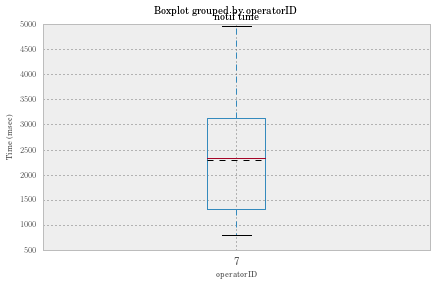

In [198]:
#timelyCC = DF[(DF['experiment'] == 'cc') & (DF['system'] == 'timely') & (DF['notif time'] < 5000)]    
watermarksCC = DF[(DF['experiment'] == 'pagerank') & (DF['system'] == 'timely')& (DF['full time'] < 5000)  & (DF['step'] > 1)] 
#watermarksCC = DF[ (DF['system'] == 'watermarks')& (DF['notif time'] < 2000)] 

#timelyCC.boxplot(column='notif time', by='ctxid', meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True)

#watermarksCC.boxplot(column='notif time', by='ctxid', meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True)

watermarksCC.boxplot(column='notif time', by='operatorID', meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True)

#DFU = byWindow.unstack('ctxid');

#fig, axes = subplots('notif time');

#ax = DFU['notif time'].boxplot(subplots = True, meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True)


axes = plt.gca()
#axes.set_ylim([0,90000])


plt.tight_layout()
plt.ylabel('Time (msec)')
plt.savefig('expnotif2.pdf', bbox_inches='tight')


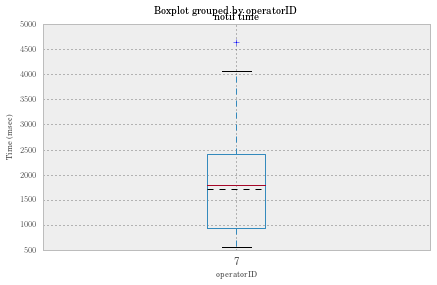

In [195]:
#timelyCC = DF[(DF['experiment'] == 'cc') & (DF['system'] == 'timely') & (DF['notif time'] < 5000)]    
watermarksCC = DF[(DF['experiment'] == 'pagerank') & (DF['system'] == 'watermarks')& (DF['full time'] < 5000) 
                  & (DF['step'] != 9223372036854775807)  & (DF['step'] > 1)] 

#watermarksCC = DF[ (DF['system'] == 'watermarks')& (DF['notif time'] < 2000)] 

#timelyCC.boxplot(column='notif time', by='ctxid', meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True)

#watermarksCC.boxplot(column='notif time', by='ctxid', meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True)

watermarksCC.boxplot(column='notif time', by='operatorID', meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True)

#DFU = byWindow.unstack('ctxid');

#fig, axes = subplots('notif time');

#ax = DFU['notif time'].boxplot(subplots = True, meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True)


axes = plt.gca()
#axes.set_ylim([0,90000])


plt.tight_layout()
plt.ylabel('Time (msec)')
plt.savefig('expnotif2.pdf', bbox_inches='tight')


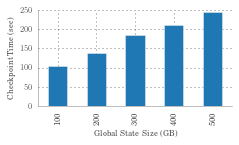

In [110]:
exectime = DF[['CP_TIME']]
ax = exectime.plot(kind='bar', legend = False, color = tableau20[0])
ax.set_xlabel("Global State Size (GB)")
ax.set_ylabel("Total Snapshotting Time (sec)")
ax.set_axis_bgcolor('white')

format_axes(ax)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('cp1time.pdf')

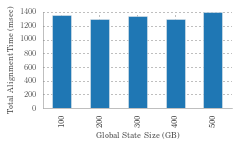

In [111]:
exectime = DF[['ALIGN_TOTAL']]
ax = exectime.plot(kind='bar', legend = False, color = tableau20[0])
ax.set_xlabel("Global State Size (GB)")
ax.set_ylabel("Total Alignment Time (msec)")
ax.set_axis_bgcolor('white')

format_axes(ax)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('cp2time.pdf')

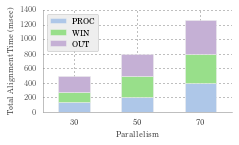

In [112]:
merges = DF2[['ALIGN_PROC', 'ALIGN_WIN', 'ALIGN_OUT']]
ax = merges.plot(kind='bar',stacked=True, rot=1, legend=False,color = [tableau20[1],tableau20[5],tableau20[9]])
ax.set_xlabel("Parallelism")
ax.set_ylabel("Total Alignment Time (msec)")
#ax.set_ylim(30000000,37000000)
plt.xticks(rotation=0)
ax2 = ax
ax.set_axis_bgcolor('white')
#DF['SUM-B2B-RED'] = DF[['AGG-B2B-E-UPDATE']] + DF[['AGG-B2B-E-MERGE']]
#reduces = DF['SUM-B2B-RED']
#reduces.columns = ['total-agg']

#ax2.plot(ax.get_xticks(),DF[['RED2-B2B-E']],linestyle='-', marker='o',linewidth=2)

#ax3 = DF[['RED-B2B-E']].plot(linestyle='-', marker='o', legend=True)
ax2.set_ylim(ax.get_ylim())

#ax2.set_yticklabels(['{:4.1f}k'.format(x/1000000) for x in vals])
#legend
#lines, labels = ax.get_legend_handles_labels()
#lines2, labels2 = ax3.get_legend_handles_labels()
legend = ax2.legend(['PROC', 'WIN', 'OUT'], loc=0)
#legendaryFormat(legend,resize=False)

format_axes(ax)
plt.tight_layout()
fig = ax2.get_figure()
fig.savefig('exp2times.pdf')